# Recognizing Spoken Digits: Luis Pereda Amaya

In [536]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [537]:
train_file = open("Train_Arabic_Digit.txt")
test_file = open("Test_Arabic_Digit.txt")
train_lines = train_file.readlines()
test_lines = test_file.readlines()


In [538]:
# Parsing Training Data

count = -1
blocks = []
# Added spaces to the end of my code for this to work
for line in train_lines:
    if(len(line) == 13):
        if(count >= 0):
            blocks.append(block)
        count += 1
        block = []
    else:
        block.append(line.strip())
blocks.append(block[0 : len(block) - 1])

digits = []
for i in range(1, 11):
    digits.append(blocks[((i-1) * 660) : (i * 660)])

for i in range(10):
    for j in range(len(digits[i])):
        for k in range(len(digits[i][j])):
            digits[i][j][k] = digits[i][j][k].split(" ")
            digits[i][j][k] = [float(num) for num in digits[i][j][k]]

menDigits = []
womenDigits = []
for i in range(10):
    menDigits.append(digits[i][0:330])
    womenDigits.append(digits[i][330:660])
    
Digits = []
for i in range(10):
    frames = []
    for j in range(len(digits[i])):
        frames = frames + digits[i][j]
    Digits.append(frames)
digits = Digits

MenDigits = []
for i in range(10):
    men_frames = []
    for j in range(len(menDigits[i])):
        men_frames = men_frames + menDigits[i][j]
    MenDigits.append(men_frames)
    
WomenDigits = []
for i in range(10):
    women_frames = []
    for j in range(len(womenDigits[i])):
        women_frames = women_frames + womenDigits[i][j]
    WomenDigits.append(women_frames)

In [539]:
len(digits[0])

23344

In [540]:
# Parsing Test Data
count = -1
blocks = []
# Added spaces to the end of my code for this to work
for line in test_lines:
    if(len(line) == 13):
        if(count >= 0):
            blocks.append(block)
        count += 1
        block = []
    else:
        block.append(line.strip())
blocks.append(block[0:len(block) - 1])


test_digits = []
for i in range(1,11):
    test_digits.append(blocks[((i-1) * 220) : (i * 220)])
    
for i in range(10):
    for j in range(len(test_digits[i])):
        for k in range(len(test_digits[i][j])):
            test_digits[i][j][k] = test_digits[i][j][k].split(" ")
            test_digits[i][j][k] = [float(num) for num in test_digits[i][j][k]]
menTestDigits = []
womenTestDigits = []
for i in range(10):
    menTestDigits.append(test_digits[i][0:110])
    womenTestDigits.append(test_digits[i][110:220])
        
test_Digits = []
for i in range(10):
    frames = []
    for j in range(len(test_digits[i])):
        frames = frames + test_digits[i][j]
    test_Digits.append(frames)
# Will use test_blocks to iterate through blocks in test
test_blocks = test_digits

test_digits = test_Digits

In [541]:
print(len(womenTestDigits[0]))

110


## K-means

In [542]:
#     centers = pca.fit_transform(cluster_centers)
#     centers_df = pd.DataFrame(data = centers, columns = ['1', '2'])
#     centers_df['color'] = clusters
#     pca_df = pd.DataFrame(data = pca_data, columns = ['1', '2'])
#     pca_df['color'] = pd.DataFrame(labels)
#     pca_df = pd.concat([pca_df, centers_df])
#     ax = sns.scatterplot(x = '1', y = '2', data = pca_df, hue = 'color', legend = 'full', palette = 'husl')

In [543]:
def findKmeans(arr, digit, clusters):
    kmeans = KMeans(n_clusters=clusters).fit(arr[digit])
    labels = kmeans.predict(arr[digit])
    return kmeans, labels 

def findAndPlotKmeans(arr, digit, clusters):
    plt.figure(figsize=[20,20])
    
    kmeans = KMeans(n_clusters=clusters).fit(arr[digit])
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.predict(test_Digits[digit])

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(test_Digits[digit])

    plt.scatter(pca_data[:, 0], pca_data[:, 1], c = labels, cmap='jet')
    return kmeans

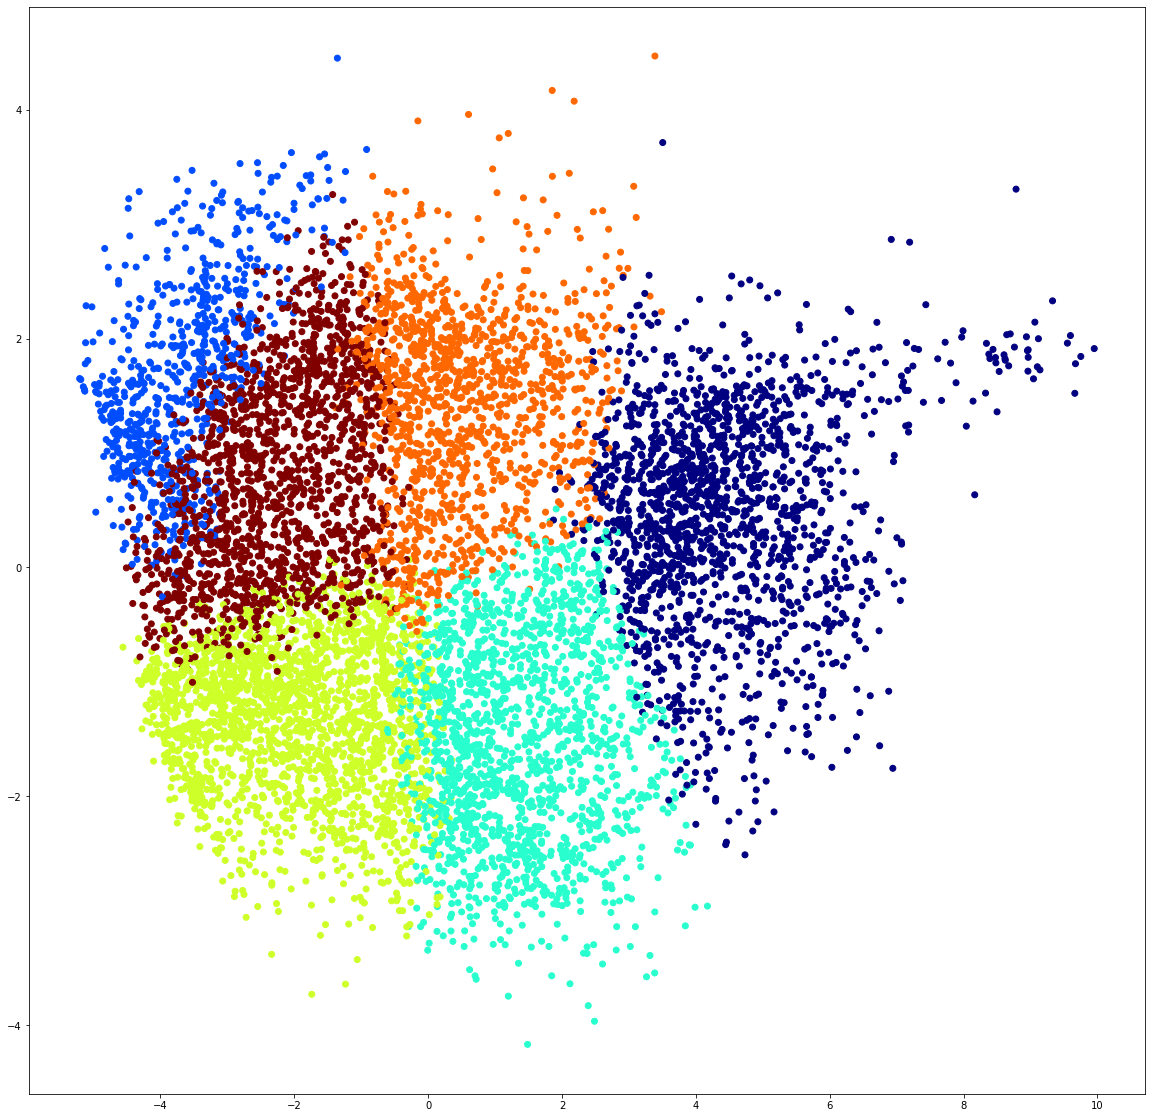

In [544]:
kmeans = findAndPlotKmeans(Digits, 4, 7)

### GMM from KMeans

In [545]:
digit_clusters = [6, 5, 7, 6, 7, 6, 5, 5, 9, 4]
digit_components = [6, 5, 7, 6, 7, 6, 5, 5, 9, 4]
kmeans_arr = []
kmeans_labels = []
for i in range(10):
    kmeans_arr.append(findKmeans(Digits, i, digit_clusters[i])[0])
    kmeans_labels.append(findKmeans(Digits, i, digit_clusters[i])[1])
    

In [546]:
kmeans_arr_men = []
kmeans_arr_women = []
kmeans_labels_men = []
kmeans_labels_women = []

for i in range(10):
    kmeans_arr_men.append(findKmeans(MenDigits, i, digit_clusters[i])[0])
    kmeans_labels_men.append(findKmeans(MenDigits, i, digit_clusters[i])[1])
    
    kmeans_arr_women.append(findKmeans(WomenDigits, i, digit_clusters[i])[0])
    kmeans_labels_women.append(findKmeans(WomenDigits, i, digit_clusters[i])[1])

In [547]:
kmeans_centers = []
for digit_model in kmeans_arr:
    kmeans_centers.append(digit_model.cluster_centers_)

In [548]:
kmeans_centers_men = []
for digit_model in kmeans_arr_men:
    kmeans_centers_men.append(digit_model.cluster_centers_)
kmeans_centers_women = []
for digit_model in kmeans_arr_women:
    kmeans_centers_women.append(digit_model.cluster_centers_)

In [549]:
df_arr = []
for i in range(10):
    cluster_df = pd.DataFrame()
    cluster_df['cluster'] = kmeans_labels[i]
    cluster_df['data'] = Digits[i]
    df_arr.append(cluster_df)


In [550]:
df_arr_men = []
df_arr_women = []
for i in range(10):
    cluster_df_men = pd.DataFrame()
    cluster_df_men['cluster'] = kmeans_labels_men[i]
    cluster_df_men['data'] = MenDigits[i]
    df_arr_men.append(cluster_df_men)
    
    cluster_df_women = pd.DataFrame()
    cluster_df_women['cluster'] = kmeans_labels_women[i]
    cluster_df_women['data'] = WomenDigits[i]
    df_arr_women.append(cluster_df_women)

In [551]:
print(len(df_arr[0]))
print(len(df_arr_men[0]))
print(len(df_arr_women[0]))

23344
11588
11756


In [552]:
# Full covariances

# for i in range(10):
#     digit_covariances = []
#     for j in range(digit_clusters[i]):
#         np_arr = np.array(df_arr[i][df_arr[i].cluster == j])
#         samples = np.array([x[1] for x in np_arr])
#         cov = np.cov(samples.T)
#         digit_covariances.append(cov)
#     full_covariances.append(digit_covariances)

# full_covariances = []

def findFullCov(data):
    arr = []
    for i in range(10):
        digit_covariances = []
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            cov = np.cov(samples.T)
            digit_covariances.append(cov)
        arr.append(digit_covariances)
    return arr

In [553]:
full_covariances = findFullCov(df_arr)
full_covariances_men = findFullCov(df_arr_men)
full_covariances_women = findFullCov(df_arr_women)

In [554]:
print(len(full_covariances[0]))
print(len(full_covariances[0][0]))
print(len(full_covariances[0][0][0]))

6
13
13


In [555]:
# Diagonal covariances
# diag_covariances = []

# for i in range(10):
#     cluster_diag_covs = []
#     for cluster_cov in full_covariances[i]:
#         diag = np.diag(np.diag(cluster_cov))
#         cluster_diag_covs.append(diag)
#     diag_covariances.append(cluster_diag_covs)
    
def findDiagCov(fullCov):
    arr = []
    for i in range(10):
        cluster_diag_covs = []
        for cluster_cov in fullCov[i]:
            diag = np.diag(np.diag(cluster_cov))
            cluster_diag_covs.append(diag)
        arr.append(cluster_diag_covs)
    return arr

In [556]:
diag_covariances = findDiagCov(full_covariances)
diag_covariances_men = findDiagCov(full_covariances_men)
diag_covariances_women = findDiagCov(full_covariances_women)

In [557]:
print(len((diag_covariances)))
print(len(diag_covariances[0]))
print(len((diag_covariances[0][0])))

10
6
13


In [558]:
# Spherical Covariance 
# sphere_covariances = []

# for i in range(10):
#     demeaned_arr = []
#     demeaned_data = np.array([])
#     for j in range(digit_clusters[i]):
#         np_arr = np.array(df_arr[i][df_arr[i].cluster == j])
#         samples = np.array([x[1] for x in np_arr])
#         mean = samples.mean(axis = 0)
#         demeaned = samples - mean
#         demeaned_arr.append(demeaned)
#     demeaned_data = np.concatenate(demeaned_arr)
#     digit_var = np.var(demeaned_data)
#     var_mat = np.identity(13) * digit_var
#     sphere_covariances.append(var_mat)

def findSphericalCov(data):
    arr = []
    for i in range(10):
        demeaned_arr = []
        demeaned_data = np.array([])
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            mean = samples.mean(axis = 0)
            demeaned = samples - mean
            demeaned_arr.append(demeaned)
        demeaned_data = np.concatenate(demeaned_arr)
        digit_var = np.var(demeaned_data)
        var_mat = np.identity(13) * digit_var
        arr.append(var_mat)
    return arr

In [559]:
sphere_covariances = findSphericalCov(df_arr)
sphere_covariances_men = findSphericalCov(df_arr_men)
sphere_covariances_women = findSphericalCov(df_arr_women)

In [560]:
print(len(sphere_covariances[0][0]))

13


In [561]:
# Tied Covariance
# tied_covariances = []
# for i in range(10):
#     demeaned_arr = []
#     demeaned_data = np.array([])
#     for j in range(digit_clusters[i]):
#         np_arr = np.array(df_arr[i][df_arr[i].cluster == j])
#         samples = np.array([x[1] for x in np_arr])
#         mean = samples.mean(axis = 0)
#         demeaned = samples - mean
#         demeaned_arr.append(demeaned)
#     demeaned_data = np.concatenate(demeaned_arr)
#     demeaned_cov = np.cov(demeaned_data.T)
#     tied_covariances.append(demeaned_cov)

def findTiedCov(data):
    arr = []
    for i in range(10):
        demeaned_arr = []
        demeaned_data = np.array([])
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            mean = samples.mean(axis = 0)
            demeaned = samples - mean
            demeaned_arr.append(demeaned)
        demeaned_data = np.concatenate(demeaned_arr)
        demeaned_cov = np.cov(demeaned_data.T)
        arr.append(demeaned_cov)
    return arr

In [562]:
tied_covariances = findTiedCov(df_arr)
tied_covariances_men = findTiedCov(df_arr_men)
tied_covariances_women = findTiedCov(df_arr_women)

In [563]:
print(len(tied_covariances[0]))
print(len(tied_covariances[0][0]))

13
13


In [564]:
# Cluster weights
# digit_weights = []

# for i in range(10):
#     weights = []
#     for j in range(digit_clusters[i]):
#         np_arr = np.array(df_arr[i][df_arr[i].cluster == j])
#         samples = np.array([x[1] for x in np_arr])
#         weight = len(samples) / len(df_arr[i])
#         weights.append(weight)
#     digit_weights.append(weights)
    
def findWeights(data):
    arr = []
    for i in range(10):
        weights = []
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            weight = len(samples) / len(data[i])
            weights.append(weight)
        arr.append(weights)
    return arr

In [565]:
digit_weights = findWeights(df_arr)
digit_weights_men = findWeights(df_arr_men)
digit_weights_women = findWeights(df_arr_women)

In [566]:
# Set up full cov models
# KMeans_GMM_full_cov = []
# for i in range(10):
#     gmm = GaussianMixture(n_components=digit_components[i], covariance_type='full')
#     gmm.means_ = kmeans_centers[i]
#     gmm.covariances_ = full_covariances[i]
#     gmm.weights_ = digit_weights[i]
#     gmm.precisions_ = np.linalg.inv(full_covariances[i])
#     gmm.precisions_cholesky_ = np.linalg.cholesky(gmm.precisions_)
#     KMeans_GMM_full_cov.append(gmm)

def setFullCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='full')
        gmm.means_ = centers[i]
        gmm.covariances_ = covs[i]
        gmm.weights_ = weights[i]
        gmm.precisions_ = np.linalg.inv(covs[i])
        gmm.precisions_cholesky_ = np.linalg.cholesky(gmm.precisions_)
        arr.append(gmm)
    return arr

In [567]:
KMeans_GMM_full_cov = setFullCovModel(kmeans_centers, full_covariances, digit_weights)
KMeans_GMM_full_cov_men = setFullCovModel(kmeans_centers_men, full_covariances_men, digit_weights_men)
KMeans_GMM_full_cov_women = setFullCovModel(kmeans_centers_women, full_covariances_women, digit_weights_women)

In [568]:
# Set up tied cov models
# KMeans_GMM_tied_cov = []
# for i in range(10):
#     gmm = GaussianMixture(n_components=digit_components[i], covariance_type='tied')
#     gmm.means_ = kmeans_centers[i]
#     gmm.covariances_ = tied_covariances[i]
#     gmm.weights_ = digit_weights[i]
#     gmm.precisions_ = np.linalg.inv(tied_covariances[i])
#     gmm.precisions_cholesky_ = np.linalg.cholesky(gmm.precisions_)
#     KMeans_GMM_tied_cov.append(gmm)
    
def setTiedCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='tied')
        gmm.means_ = centers[i]
        gmm.covariances_ = covs[i]
        gmm.weights_ = weights[i]
        gmm.precisions_ = np.linalg.inv(covs[i])
        gmm.precisions_cholesky_ = np.linalg.cholesky(gmm.precisions_)
        arr.append(gmm)
    return arr

In [569]:
KMeans_GMM_tied_cov = setTiedCovModel(kmeans_centers, tied_covariances, digit_weights)
KMeans_GMM_tied_cov_men = setTiedCovModel(kmeans_centers_men, tied_covariances_men, digit_weights_men)
KMeans_GMM_tied_cov_women = setTiedCovModel(kmeans_centers_women, tied_covariances_women, digit_weights_women)

In [570]:
# Set up diag cov models
# KMeans_GMM_diag_cov = []
# for i in range(10):
#     gmm = GaussianMixture(n_components=digit_components[i], covariance_type='diag')
#     gmm.means_ = kmeans_centers[i]
#     gmm.covariances_ = [np.diag(cluster) for cluster in diag_covariances[i]]
#     gmm.weights_ = digit_weights[i]
#     diag_precisions_matrix = np.linalg.inv(diag_covariances[i])
#     gmm.precisions_ = [np.diag(item) for item in diag_precisions_matrix]
#     gmm.precisions_cholesky_ = np.array([np.diag(item) for item in np.linalg.cholesky(diag_precisions_matrix)])
#     KMeans_GMM_diag_cov.append(gmm)
    
def setDiagCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='diag')
        gmm.means_ = centers[i]
        gmm.covariances_ = [np.diag(cluster) for cluster in covs[i]]
        gmm.weights_ = weights[i]
        diag_precisions_matrix = np.linalg.inv(covs[i])
        gmm.precisions_ = [np.diag(item) for item in diag_precisions_matrix]
        gmm.precisions_cholesky_ = np.array([np.diag(item) for item in np.linalg.cholesky(diag_precisions_matrix)])
        arr.append(gmm)
    return arr

In [571]:
KMeans_GMM_diag_cov = setDiagCovModel(kmeans_centers, diag_covariances, digit_weights)
KMeans_GMM_diag_cov_men = setDiagCovModel(kmeans_centers_men, diag_covariances_men, digit_weights_men)
KMeans_GMM_diag_cov_women = setDiagCovModel(kmeans_centers_women, diag_covariances_women, digit_weights_women)

In [572]:
# Set up spherical cov models:
# KMeans_GMM_spherical_cov = []
# for i in range(10):
#     gmm = GaussianMixture(n_components=digit_components[i], covariance_type='spherical')
#     gmm.means_ = kmeans_centers[i]
#     gmm.covariances_ = sphere_covariances[i][0][0]
#     gmm.weights_ = digit_weights[i]
#     sphere_precisions_matrix = np.linalg.inv(sphere_covariances[i])
#     gmm.precisions_ = sphere_precisions_matrix[0][0]
#     gmm.precisions_cholesky_ = np.linalg.cholesky(sphere_precisions_matrix)[0][0]
#     KMeans_GMM_spherical_cov.append(gmm)
    
def setSphericalCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='spherical')
        gmm.means_ = centers[i]
        gmm.covariances_ = covs[i][0][0]
        gmm.weights_ = weights[i]
        sphere_precisions_matrix = np.linalg.inv(covs[i])
        gmm.precisions_ = sphere_precisions_matrix[0][0]
        gmm.precisions_cholesky_ = np.linalg.cholesky(sphere_precisions_matrix)[0][0]
        arr.append(gmm)
    return arr

In [573]:
KMeans_GMM_spherical_cov = setSphericalCovModel(kmeans_centers, sphere_covariances, digit_weights)
KMeans_GMM_spherical_cov_men = setSphericalCovModel(kmeans_centers_men, sphere_covariances_men, digit_weights_men)
KMeans_GMM_spherical_cov_women = setSphericalCovModel(kmeans_centers_women, sphere_covariances_women, digit_weights_women)

### ML Classification

In [574]:
# Spherical 
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = KMeans_GMM_spherical_cov[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = KMeans_GMM_spherical_cov[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.7781818181818182


In [575]:
# Diagonal
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = KMeans_GMM_diag_cov[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = KMeans_GMM_diag_cov[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.7518181818181818


In [576]:
# Tied
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = KMeans_GMM_tied_cov[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = KMeans_GMM_tied_cov[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.8586363636363636


In [577]:
# Full
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = KMeans_GMM_full_cov[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = KMeans_GMM_full_cov[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.5990909090909091


## Expectation-Maximization

In [578]:
# Seaborn stuff
    # pca_df = pd.DataFrame(data = pca_data, columns = ['1', '2'])
    # pca_df['color'] = pd.DataFrame(labels)
    # ax = sns.scatterplot(x = '1', y = '2', data = pca_df, hue = 'color', legend = 'full', palette = 'husl')

In [579]:
def findAndPlotEM(digit, components, covar_type):   
#     plt.figure(figsize=[20,20])

    em_model = GaussianMixture(n_components=components, covariance_type= covar_type).fit(Digits[digit])
    return em_model

#     pca = PCA(n_components=2)
#     pca_data = pca.fit_transform(test_Digits[digit])
#     plt.scatter(pca_data[:, 0], pca_data[:, 1], c = labels, cmap='jet')

In [580]:
def findAndPlotEMGendered(digit, components, covar_type, genderBoolean):
    # Let true be male and false female (F for female)
    if (genderBoolean):
        em_model = GaussianMixture(n_components=components, covariance_type= covar_type).fit(MenDigits[digit])
    else:
        em_model = GaussianMixture(n_components=components, covariance_type= covar_type).fit(WomenDigits[digit])
    
    return em_model
        

In [581]:
em_models_full = []
em_male_models_full = []
em_female_models_full = []

em_models_tied = []
em_male_models_tied = []
em_female_models_tied = []

em_models_diag = []
em_male_models_diag = []
em_female_models_diag = []

em_models_sphere = []
em_male_models_sphere = []
em_female_models_sphere = []

# Components defined empirically by looking for well defined clusters near 2n - 1 where n is phonemes
digit_components = [6, 7, 7, 6, 7, 6, 5, 5, 9, 4]
for i in range(10):
    em_models_full.append(findAndPlotEM(i, digit_components[i], 'full'))
    em_male_models_full.append(findAndPlotEMGendered(i, digit_components[i], 'full', True))
    em_female_models_full.append(findAndPlotEMGendered(i, digit_components[i], 'full', False))
    
    em_models_tied.append(findAndPlotEM(i, digit_components[i], 'tied'))
    em_male_models_tied.append(findAndPlotEMGendered(i, digit_components[i], 'tied', True))
    em_female_models_tied.append(findAndPlotEMGendered(i, digit_components[i], 'tied', False))
    
    em_models_diag.append(findAndPlotEM(i, digit_components[i], 'diag'))
    em_male_models_diag.append(findAndPlotEMGendered(i, digit_components[i], 'diag', True))
    em_female_models_diag.append(findAndPlotEMGendered(i, digit_components[i], 'diag', False))
    
    em_models_sphere.append(findAndPlotEM(i, digit_components[i], 'spherical'))
    em_male_models_sphere.append(findAndPlotEMGendered(i, digit_components[i], 'spherical', True))
    em_female_models_sphere.append(findAndPlotEMGendered(i, digit_components[i], 'spherical', False))
    

In [582]:
print(em_models_full[1].weights_)

[0.12979205 0.141762   0.1327652  0.14101546 0.14084489 0.13656004
 0.17726035]


### ML Classification

In [583]:
# Non-gendered Full
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = em_models_full[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_models_full[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.8813636363636363


In [584]:
# Non-gendered Tied
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = em_models_tied[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_models_tied[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.8904545454545455


In [585]:
# Non-gendered Diag
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = em_models_diag[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_models_diag[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.8772727272727273


In [586]:
# Non-gendered Spherical
correct = 0
total = 0
for i in range(10):
    for block in test_blocks[i]:
        maxScore = em_models_sphere[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_models_sphere[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct / total)

0.7777272727272727


In [587]:
# Gendered full

correct = 0
total = 0
for i in range(10):
    for block in menTestDigits[i]:
        maxScore = em_male_models_full[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_male_models_full[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
for i in range(10):
    for block in womenTestDigits[i]:
        maxScore = em_female_models_full[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_female_models_full[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct/total)


0.8522727272727273


In [588]:
# Gendered tied

correct = 0
total = 0
for i in range(10):
    for block in menTestDigits[i]:
        maxScore = em_male_models_tied[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_male_models_tied[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
for i in range(10):
    for block in womenTestDigits[i]:
        maxScore = em_female_models_tied[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_female_models_tied[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct/total)

0.884090909090909


In [589]:
# Gendered diag

correct = 0
total = 0
for i in range(10):
    for block in menTestDigits[i]:
        maxScore = em_male_models_diag[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_male_models_diag[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
for i in range(10):
    for block in womenTestDigits[i]:
        maxScore = em_female_models_diag[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_female_models_diag[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct/total)

0.9004545454545455


In [590]:
# Gendered spherical

correct = 0
total = 0
for i in range(10):
    for block in menTestDigits[i]:
        maxScore = em_male_models_sphere[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_male_models_sphere[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
for i in range(10):
    for block in womenTestDigits[i]:
        maxScore = em_female_models_sphere[0].score(block)
        maxIndex = 0
        total += 1
        for digit in range(10):
            score = em_female_models_sphere[digit].score(block)
            if(score > maxScore):
                maxScore = score
                maxIndex = digit
        if(maxIndex == i):
            correct += 1
print(correct/total)

0.84


In [591]:
(em_models_tied[0].covariances_)

array([[ 2.75391495e+00, -3.22116037e-01, -2.67389921e-01,
        -2.66260166e-01, -3.58521125e-01, -3.28542176e-01,
        -2.86743789e-01, -6.18524710e-02, -7.34521617e-02,
        -1.07164947e-01, -2.39797301e-01, -1.32916391e-01,
        -2.60656496e-01],
       [-3.22116037e-01,  1.88565549e+00,  2.32870713e-01,
         1.36353334e-01,  2.84312112e-01,  1.37922295e-01,
         7.45070220e-02, -1.58937093e-01,  1.08284117e-01,
         8.54694946e-03, -6.26001026e-02, -1.11064599e-01,
        -4.90591220e-02],
       [-2.67389921e-01,  2.32870713e-01,  8.92952234e-01,
         3.28002348e-01,  8.21950235e-02, -4.72232398e-02,
        -7.25844469e-04, -5.95300924e-03,  2.09654045e-03,
        -2.18222887e-02,  2.74798234e-02,  2.78594482e-02,
        -1.05960852e-01],
       [-2.66260166e-01,  1.36353334e-01,  3.28002348e-01,
         6.92103656e-01,  8.40486176e-02, -2.90547500e-02,
        -1.90417712e-02,  1.86538817e-02,  3.96353016e-04,
        -6.49201169e-02,  2.66714561e

In [592]:
(tied_covariances[0])

array([[ 1.44600929e+00, -6.28518205e-02, -6.07749119e-02,
         2.54655714e-03, -1.42607141e-01, -1.32238979e-01,
        -1.50799349e-01,  2.50193988e-02, -4.89401459e-02,
        -6.23083346e-02, -1.40454018e-01, -8.01688069e-03,
        -1.50986782e-01],
       [-6.28518205e-02,  1.48010962e+00, -1.71529393e-02,
         5.81529095e-02,  9.53328070e-02,  8.57234197e-02,
         4.25183146e-03, -6.90146703e-02,  4.48067415e-02,
         1.64687812e-02, -7.98090143e-02, -4.19337902e-02,
        -3.66023097e-02],
       [-6.07749119e-02, -1.71529393e-02,  9.08691265e-01,
         3.11294800e-01,  6.55452307e-02, -5.59804632e-02,
         1.95875603e-02,  8.84522767e-03,  1.77445140e-03,
         2.23050050e-02,  2.76971494e-02,  1.32129197e-02,
        -1.01605224e-01],
       [ 2.54655714e-03,  5.81529095e-02,  3.11294800e-01,
         7.76587460e-01,  4.10767300e-02, -1.41299931e-02,
        -4.49965934e-02,  9.05336847e-02, -2.11903288e-02,
         7.04326408e-04, -1.50198946e